In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
from matplotlib import pyplot as plt

In [196]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://hub.tensorflow.google.cn/google/tf2-preview/mobilenet_v2/classification/4", output_shape=[1001], trainable=True)
])

In [192]:
m.trainable

True

In [218]:
m1 = hub.KerasLayer("https://hub.tensorflow.google.cn/google/tf2-preview/mobilenet_v2/classification/4", output_shape=[1001], trainable=True)

In [161]:
m2 = hub.load("https://hub.tensorflow.google.cn/google/tf2-preview/mobilenet_v2/classification/4")

In [210]:
m1.build([None, 300,300,3])

In [221]:
m1(cat)

<tf.Tensor: shape=(1, 1001), dtype=float32, numpy=
array([[ 0.27775583,  0.0720329 , -0.3058362 , ..., -0.62340117,
         0.15747201,  1.1458929 ]], dtype=float32)>

In [237]:
num_classes = 10
new_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4", output_shape=[2048], trainable=False),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [238]:
new_model.build([None, 299,299,3])

In [248]:
new_model.layers

In [8]:
a = m.layers[0]

In [150]:
model = keras.applications.MobileNetV2(weights='imagenet')

In [151]:
model.input

<tf.Tensor 'input_3:0' shape=(None, 224, 224, 3) dtype=float32>

In [34]:
img = tf.io.read_file("/Users/user/.keras/datasets/cat.jpg")
img = tf.io.decode_jpeg(img)

In [39]:
cat = tf.image.resize(img, [224,224])[tf.newaxis]

In [50]:
cat = cat/255.

In [51]:
model.predict(cat).argmax()

287

In [114]:
names = ['Conv1', 'block_1_expand','block_2_expand', 'block_3_expand', 'block_4_expand', 'block_5_expand', 'block_6_expand', 'block_7_expand']

In [115]:
out = [model.get_layer(i).output for i in names]

In [116]:
show = keras.Model(model.input, out)

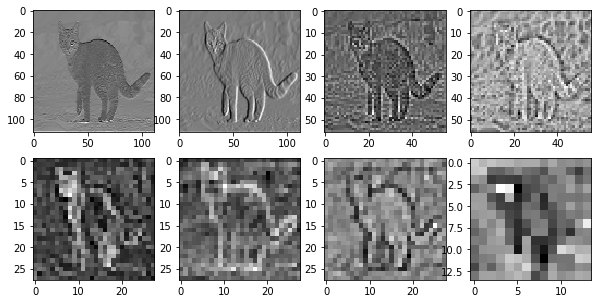

In [143]:
plt.figure(figsize=[10,5])
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(show.predict(cat)[i][0][:,:,0], cmap=plt.cm.gray)